# An Twitter Analysis Program

Input: 
- The trend news they want to see

Outputs: 
- The relevant trend within a certain timeline and put them in order

High-Level Algorithm (step by step, plain English no Python!)
```
Import module we will use for the program
Define the function by using the trend function from tweepy and get the trend news
Define the geographical position of trends and get the location
By using the panda function to put the trend in a data frame and get a chart
User need to enter the index number from the chart that we previously show and pick the one they like
Extract the key information from that trend and put it in the timeline function
We can get topics that is relevant with the trend
By comparing the comment and like number under each topic, we will filter the hottest top 20 topics
Put these hottest tweets to the panda and form another chart
User can pick the tweet they like and view more detail information.
By using the folium function, putting tweets from different locations into the map
Use the choropleth function, add data and color to tell which state is happening big things
```


# Part 1

In [3]:
import import_ipynb
import SupportFunction as sf
import Twitter
from IPython.display import display
import sys 
import ipywidgets as widgets

trend = Twitter.trend()

pos = 0
neg = 0
neutral = 0
usrPlace = input(f"Enter a place to see twitter trend --> ")    
trendid = sf.find_availiable_trend(usrPlace)
try:
    trend_df = sf.get_trendlist(trendid)
    print(f'here is the top 10 trending on twitter in {usrPlace}, sorted by tweet_volume')
    display(trend_df)
except:
    print(trendid)
    sys.exit()

display('Choose a trend topic you would like to dig in: ')
topic_dropdown = widgets.Dropdown(
    options = trend_df['name'],
    description = 'Topic:',
    disabled = False,
)
confirm_buttion = widgets.Button(
    value=False,
    description='Confirm',
    disabled=False,
    tooltip='CLick to Confirm',
    icon='check'
)
chooseTrend = widgets.VBox(children=[topic_dropdown, confirm_buttion])
display(chooseTrend)

Enter a place to see twitter trend --> Boston
here is the top 10 trending on twitter in Boston, sorted by tweet_volume


,name,tweet_volume
0,Corbyn,645173.0
3,Tories,528414.0
11,The UK,376659.0
9,Boris Johnson,339185.0
2,#UKElection,231797.0
10,Britain,206830.0
8,Scotland,173703.0
27,Remain,153091.0
6,#BeBest,146174.0
20,U.K.,71676.0


'Choose a trend topic you would like to dig in: '

<IPython.core.display.Javascript object>

In [6]:
%blockrun confirm_buttion

# Part 2
what we doing here

Getting the sentiment analysis...
the top 100 highest retweet tweet of #UKElection


,screen_name,tweet,time,location,retweet_count,tweet_id
80,kekepete1,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:23,,47058,1205296876645474304
89,plantsnpodcasts,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:20,Ireland,47058,1205296865253756940
70,LindaLorraineS1,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:25,,47058,1205296887374311427
28,ckahoe11,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:37,,47058,1205296937077002240
21,DruSefton,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:39,"Adams Morgan, Washington, D.C.",47058,1205296944685502468
83,fernandapuentes,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:21,"Santiago, Chile",47058,1205296868558868481
15,Heimatlos4nowEd,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:40,"Buenos Aires, Argentina",47058,1205296948493848576
62,JanCzarRN,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:27,,47058,1205296895696023558
54,bluebeardberry,RT @GretaThunberg: Every election is a climate...,2019-12-13 01:22:29,"Austin, TX",47058,1205296901022576641
85,Pennylane2004,RT @davidschneider: 88% of Tory ads contained ...,2019-12-13 01:22:21,"Pennsylvania, USA",3260,1205296867250233344


Generating the sentiment analysis chart...
enter the ID to view it on Twitter.com


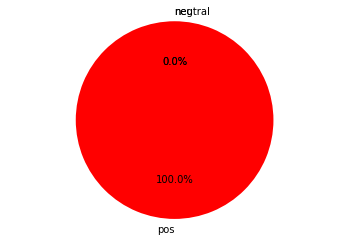

None

end of the program


In [7]:
result = Twitter.search(topic_dropdown.value)
result_df = sf.tweet2df(result)

print('Getting the sentiment analysis...')

for tweet in result_df:
    SentimentResult = sf.GetSentiment(result_df['tweet'])
    if SentimentResult['label']=='pos':
        result_df
        pos+=1
    elif SentimentResult['label']=='neg':
        neg+=1
    else:
        neutral+=1
        
print(f"the top 100 highest retweet tweet of {topic_dropdown.value}")        
display(result_df)

print('Generating the sentiment analysis chart...')
sentiment=[pos,neg,neutral]

display(sf.viewOnTwitter(result_df))

display(sf.pie_graph(sentiment))

print('end of the program')